# Используем модель

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Great_BD.tsv", delimiter = '\t')
target = data[data["Is_Target"]==1]
target.reset_index(drop=True, inplace=True)
data = data[data["Is_Target"]==0]

In [2]:
with open("Price Model.pkl", "rb") as f:
    price_model = pickle.load(f)

In [3]:
with open("Sales Value Model.pkl", "rb") as f:
    value_model = pickle.load(f)

In [6]:
target_features = target.drop(columns = ['Title', 'Price', 'Shipping_cost', 'Sales_Count', 'Sales_Value', 'Link', 'Seller Notes', 'Model','Lock Status', 'Contract', 'Model Number', 'Style', 'MPN', 'Connectivity', 'Features', 'Memory Card Type', 'Color'])
target["Expected Price"] = price_model.predict(target_features)
target["Expected Sales Value"] = value_model.predict(target_features)

In [7]:
target

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Lightning,Quad-Band,Tri-Band,Wireless charging,WAP,WCDMA,Last_Sale,Is_Target,Expected Price,Expected Sales Value
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,31.59,5.00,34.0,1074.14,https://www.ebay.com/itm/275016352540?nordt=tr...,Used,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 3.1 C,...,0.0,0,0,0.0,0,0,2023-06-13,1,49.304158,4133.352115
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",103.50,0.00,4.0,414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,Open box,“The phone is in good condition. without earph...,nokia,Nokia 6,...,0.0,0,0,0.0,0,0,2023-06-13,1,145.394653,18312.525102
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,161.24,0.00,8.0,1289.92,https://www.ebay.com/itm/295688872962?nordt=tr...,New,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 8,...,0.0,0,0,0.0,0,0,2023-06-13,1,198.749012,17747.440225
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,42.95,5.50,26.0,1116.79,https://www.ebay.com/itm/164928279178?nordt=tr...,Used,"“1 year warranty, refurbished to a flawless ne...",nokia,Nokia N8,...,0.0,0,0,0.0,0,0,2023-06-13,1,79.907511,5133.021891
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,87.00,8.22,1.0,87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,Used,“Excellent Condition.”,nokia,Nokia G50,...,0.0,0,0,0.0,0,0,2023-06-13,1,223.552450,13606.790740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,Xiaomi Redmi K60 5G Snapdragon Gen 8+ 67W Fast...,562.24,0.00,1.0,562.24,https://www.ebay.com/itm/295575470723?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Redmi K60,...,0.0,1,1,0.0,1,1,2023-03-31,1,290.055723,35241.672517
5356,Samsung Galaxy A20- Black (T-Mobile) (Locked) ...,299.00,0.00,1.0,299.00,https://www.ebay.com/itm/295576987139?nordt=tr...,Used,"“The item was used, and been restored to 100% ...",samsung,Samsung Galaxy A20,...,0.0,0,0,0.0,0,0,2023-03-27,1,69.995650,8108.457167
5357,Xiaomi Redmi Note 11 4G Volte 128GB,180.00,9.65,1.0,180.00,https://www.ebay.com/itm/295588396316?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Xiaomi Redmi Note 11,...,0.0,0,0,0.0,0,0,2023-04-01,1,308.892100,36850.918120
5358,Redmi Note 8 Pro 64gb CRACKED BACK (GSM Unlock...,70.00,10.20,1.0,70.00,https://www.ebay.com/itm/295603254066?nordt=tr...,For parts or not working,"“The item was used, and been restored to 100% ...",redmi,Redmi Note 8 Pro,...,0.0,0,0,0.0,0,0,2023-04-28,1,181.181935,19172.009247


In [8]:
target .to_csv('Nokia and Redmi estimated.tsv', index = False, sep = '\t')

# Анализ результатов

# Анализ общих результатов

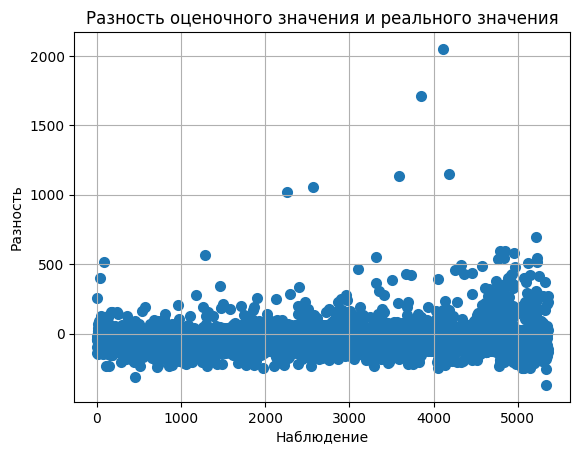

In [11]:
fig, ax = plt.subplots(1)
ax.scatter(target.index, target["Price"] - target["Expected Price"], lw=2)
ax.set_title(r'Разность оценочного значения и реального значения')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Разность')
ax.grid()

Есть выбросы. Клятые капиталисты завышают цены и народ ведётся. Правда, иногда цены занижены. Это видно на точечной диаграмме.

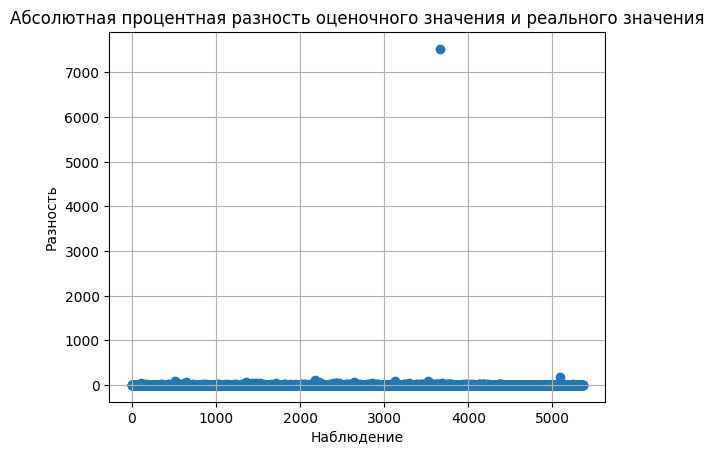

In [12]:
fig, ax = plt.subplots(1)
diff = np.abs((target["Price"] - target["Expected Price"])/target["Price"])
ax.scatter(target.index, diff)
ax.set_title('Абсолютная процентная разность оценочного значения и реального значения')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Разность')
ax.grid()
plt.show()

Есть одно значение, которое портит всю картину.

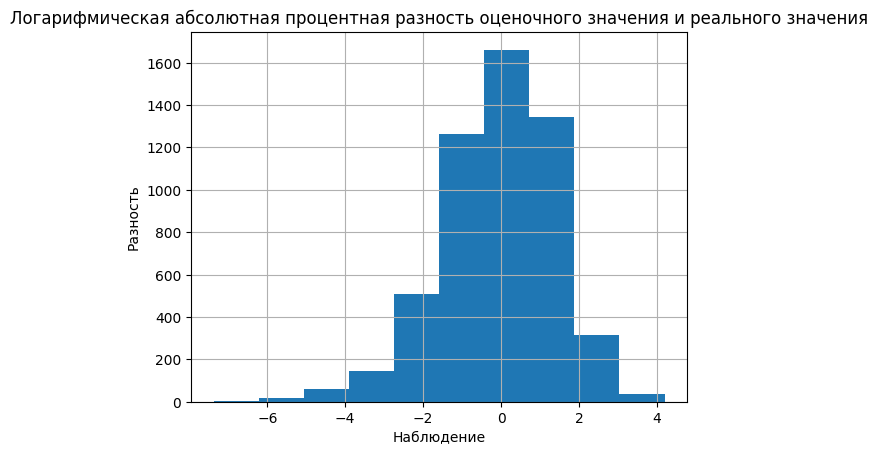

In [14]:
fig, ax = plt.subplots(1)
diff = np.abs((target["Price"] - target["Expected Price"])/target["Price"])
diff = diff[diff<np.quantile(diff, 0.999)]
ax.hist(np.log(diff))
ax.set_title('Логарифмическая абсолютная процентная разность оценочного значения и реального значения')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Разность')
ax.grid()
plt.show()

Кажется, разность между реальным значением и ожидаемым значением имеет лог. нормальное распределение.

## Анализ Nokia

In [16]:
Nokia = target[target["Brand"] == "nokia"]
Nokia.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Lightning,Quad-Band,Tri-Band,Wireless charging,WAP,WCDMA,Last_Sale,Is_Target,Expected Price,Expected Sales Value
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,31.59,5.00,34.0,1074.14,https://www.ebay.com/itm/275016352540?nordt=tr...,Used,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 3.1 C,...,0.0,0,0,0.0,0,0,2023-06-13,1,49.304158,4133.352115
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",103.50,0.00,4.0,414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,Open box,“The phone is in good condition. without earph...,nokia,Nokia 6,...,0.0,0,0,0.0,0,0,2023-06-13,1,145.394653,18312.525102
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,161.24,0.00,8.0,1289.92,https://www.ebay.com/itm/295688872962?nordt=tr...,New,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 8,...,0.0,0,0,0.0,0,0,2023-06-13,1,198.749012,17747.440225
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,42.95,5.50,26.0,1116.79,https://www.ebay.com/itm/164928279178?nordt=tr...,Used,"“1 year warranty, refurbished to a flawless ne...",nokia,Nokia N8,...,0.0,0,0,0.0,0,0,2023-06-13,1,79.907511,5133.021891
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,87.00,8.22,1.0,87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,Used,“Excellent Condition.”,nokia,Nokia G50,...,0.0,0,0,0.0,0,0,2023-06-13,1,223.552450,13606.790740


In [19]:
grouped_Nokia = Nokia.groupby('Last_Sale').agg({'Price': 'mean', 'Expected Price': 'mean', 'Sales_Count': 'sum', 'Sales_Value': 'sum', 'Expected Sales Value': 'sum'})
grouped_Nokia

,Price,Expected Price,Sales_Count,Sales_Value,Expected Sales Value
Last_Sale,,,,,
2023-03-10,70.000000,92.706962,3.0,213.00,16025.554160
2023-03-11,173.342222,156.194784,44.0,11754.31,119777.221600
2023-03-12,60.248000,108.842512,8.0,463.50,61971.834930
2023-03-13,48.376923,91.780296,118.0,7191.68,172567.805497
2023-03-14,47.238182,85.121645,58.0,2355.57,98914.253649
...,...,...,...,...,...
2023-06-09,70.050500,116.060048,505.0,45499.48,787876.184577
2023-06-10,59.909608,108.146513,269.0,14300.19,495558.612258
2023-06-11,58.880308,118.885410,1080.0,59833.14,864295.743787
